In [1]:
# Packages:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataframe as a pandas object:

df = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [3]:
# Confirm mean value:

df['order_amount'].mean()

3145.128

### The above value confirms that the mean order value is indeed strange and the dataset needs to be explored to find anamolies. 

In [4]:
# Sort the order values to see max and min:

df.sort_values(by=['order_amount'], ascending = False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-12 04:00:00.000
3332,3333.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-24 04:00:00.000
520,521.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-02 04:00:00.000
1602,1603.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-17 04:00:00.000
60,61.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-04 04:00:00.000
...,...,...,...,...,...,...,...
3871,3872.0,92.0,818.0,90.0,1.0,debit,2017-03-18 09:10:07.550
2503,2504.0,92.0,935.0,90.0,1.0,credit_card,2017-03-28 02:30:25.553
4414,4415.0,92.0,927.0,90.0,1.0,credit_card,2017-03-17 09:57:01.115
3363,3364.0,92.0,730.0,90.0,1.0,credit_card,2017-03-11 23:20:31.493


## EDA Analysis:

**It can be seen that there are some order_amounts that are extremely high - over 700k $. This is indeed strange. We can see that this is occuring only in shop_id 42 and 78. We also observe the total_items for each order.

*For shop 42, the total items are almost 2000. It probably is a wholesale store, selling bulk products. Nothing strange there since each product is almost ~350$ which is acceptable.*

*However, for shop 78, only 1 item is being sold per item at a very very high rate! ~25k. This makes no sense and there might be some data discrepancy. This cannot be used to fetch reports.*

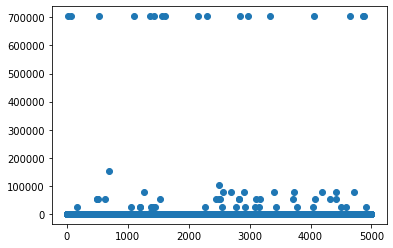

In [5]:
# Visualize where the outliers could lie at:

plt.scatter(df['order_id'], df['order_amount'])
plt.show()

### We can see the Visualization above that shows the outliers!

## Steps to Resolve:

**We can safely conclude that the AOV is basically total revenue by each shop divided by total number of products

*We can find the above fields by running the below cells:

In [6]:
# Group by shop_id and find the total revenue for each shop_id:

find_Revenue = pd.DataFrame(df.groupby('shop_id')['order_amount'].agg('sum'))
find_Revenue.rename(columns={'order_amount': 'Revenue_per_shop'}, inplace=True)

In [7]:
# Group by shop_id and find the total items sold for each shop_id:

find_TotalItems = pd.DataFrame(df.groupby('shop_id')['total_items'].agg('sum'))
find_TotalItems.rename(columns={'total_items': 'Total_Items_per_shop'}, inplace=True)

In [8]:
clean_df = pd.concat([find_Revenue, find_TotalItems], axis=1)
clean_df['AOV'] = clean_df['Revenue_per_shop']/clean_df['Total_Items_per_shop']
clean_df.sort_values(by = ['AOV'], ascending = False)

,Revenue_per_shop,Total_Items_per_shop,AOV
shop_id,,,
78.0,2263800.0,88.0,25725.0
42.0,11990176.0,34063.0,352.0
12.0,18693.0,93.0,201.0
89.0,23128.0,118.0,196.0
99.0,18330.0,94.0,195.0
...,...,...,...
53.0,14560.0,130.0,112.0
100.0,8547.0,77.0,111.0
32.0,7979.0,79.0,101.0


**The below cell outputs the average mean of the order_amount by removing the shops 42 and 78. But this is not correct since we have not taken into account the total number of items sold per order.**

In [9]:
# Filter out rows for shop id's with large order_amounts:
# Find the updated mean using just order_amount

values = [42, 78]
df = df[df.shop_id.isin(values) == False]
df['order_amount'].mean()

300.1558229655313

**The below cell outputs the average mean of the AVERAGE ORDER VALUE (AOV) by removing the shop 78 from the list. This takes into account the number of items sold. This value could be the most accurate average that can be used in the analytics tool.**

In [10]:
# Find updated mean using the actual AOV values for each shop by removing outlier shop_id 78
clean_df = clean_df.drop(78)
clean_df['AOV'].mean()

152.26262626262627